In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler

In [2]:
%config IPCompleter.greedy=True
#%config NotebookApp.iopub_data_rate_limit=1.0e10

In [3]:
data = open('/home/shobhit/NewDataset/UCI HAR Dataset/train/X_train.txt')

In [4]:
lines = data.readlines()
len(lines)

7352

In [5]:
lines[1]

'  2.7841883e-001 -1.6410568e-002 -1.2352019e-001 -9.9824528e-001 -9.7530022e-001 -9.6032199e-001 -9.9880719e-001 -9.7491437e-001 -9.5768622e-001 -9.4306751e-001 -5.5785126e-001 -8.1840869e-001  8.4930787e-001  6.8584458e-001  8.2263681e-001 -9.8193011e-001 -9.9999130e-001 -9.9978838e-001 -9.9840537e-001 -9.9915036e-001 -9.7786550e-001 -9.4822478e-001 -7.1489166e-001 -5.0093000e-001 -5.7097906e-001  6.1162716e-001 -3.2954862e-001  2.8421321e-001  2.8459454e-001  1.1570542e-001 -9.0962529e-002  2.9431041e-001 -2.8121057e-001  8.5988430e-002 -2.2152694e-002 -1.6656535e-002 -2.2064350e-001 -1.3428663e-002 -7.2691890e-002  5.7938169e-001  9.6656113e-001 -1.4155127e-001  1.0937881e-001 -9.9741134e-001 -9.8944741e-001 -9.3163868e-001 -9.9788359e-001 -9.8961366e-001 -9.3324040e-001  8.9206031e-001 -1.6134256e-001  1.2258573e-001  9.8452014e-001 -1.1489334e-001  1.0276411e-001 -3.8342955e-001  9.0782890e-001 -9.7058275e-001 -9.7850045e-001 -9.9918838e-001 -9.9002851e-001 -9.4168540e-001 -1.000

In [6]:
new_lines=[]
for i,line in enumerate(lines):
    temp = line.strip('\n')
    temp = temp.strip('  ')
    temp = re.sub("\s+",",",temp.strip())
    a=[float(e) for e in temp.split(',')]
    new_lines.append(a)

In [7]:
z=np.array(new_lines)
z.shape

(7352, 561)

In [8]:
#pca = PCA(n_components=4)
#pca.fit(z)

In [9]:
#print(pca.explained_variance_ratio_)

In [10]:
#sample = pca.transform(z)
#sample[9]
scale=StandardScaler()
scale.fit(z)
sample=scale.transform(z)
pca = PCA(n_components=4)
pca.fit(sample)
sample = pca.transform(sample)

**Elbow using Root Mean Square Standard Deviation**

In [11]:
RMSSTD={}
K = range(1,10)
for k in K :
    RMSSTD[k]=0
    kmeansModel = KMeans(n_clusters=k)
    labels= kmeansModel.fit_predict(sample)
    centers = kmeansModel.cluster_centers_
    sample_transformed = kmeansModel.fit_transform(sample)
    for i in range(0,k):
        cluster_datapoints = pd.DataFrame(sample[labels==i],columns=["PC1","PC2","PC3","PC4"])
        print(cluster_datapoints.head())
        
        #Mean Value of each dimention of datapoints in this cluster
        cluster_mean = cluster_datapoints.mean(axis=0)
        print("Cluster Mean= "+str(cluster_mean))
        
        for index,row in cluster_datapoints.iterrows():
            a=(row["PC1"]-cluster_mean["PC1"])**2
            b=(row["PC2"]-cluster_mean["PC2"])**2
            c=(row["PC3"]-cluster_mean["PC3"])**2
            d=(row["PC4"]-cluster_mean["PC4"])**2
            err=math.sqrt(a+b+c+d)
            RMSSTD[k]=RMSSTD[k]+err
    #Calculate the mean error for entire dataset
    RMSSTD[k]=RMSSTD[k]/len(sample)
    print("RMSSTD = "+str(RMSSTD))

         PC1       PC2       PC3       PC4
0 -16.138544  2.152024  3.144741 -0.272746
1 -15.296194  1.387144 -0.682200  2.813785
2 -15.137019  2.473351 -1.756623  3.718086
3 -15.350884  3.915681 -1.790352  2.567377
4 -15.544814  4.598737 -2.188576  2.897639
Cluster Mean= PC1   -2.627085e-15
PC2    4.394985e-16
PC3    7.642901e-16
PC4    6.886041e-18
dtype: float64
RMSSTD = {1: 17.438203436542373}
         PC1       PC2       PC3       PC4
0 -16.138544  2.152024  3.144741 -0.272746
1 -15.296194  1.387144 -0.682200  2.813785
2 -15.137019  2.473351 -1.756623  3.718086
3 -15.350884  3.915681 -1.790352  2.567377
4 -15.544814  4.598737 -2.188576  2.897639
Cluster Mean= PC1   -13.972464
PC2     1.009867
PC3     0.650071
PC4    -0.050964
dtype: float64
         PC1        PC2        PC3        PC4
0   1.302322 -14.833216   4.104156  -3.452074
1   2.196544 -18.725457   9.903335  -7.659522
2  12.255331  -8.613437   7.579317  -7.398857
3  12.775050  -8.822866  12.506251 -13.241394
4  15.972779  -

         PC1       PC2       PC3       PC4
0 -15.296194  1.387144 -0.682200  2.813785
1 -12.368140 -6.380008  2.863026  1.131666
2 -15.156826 -0.727552  2.025418  1.951191
3 -15.469740  1.190094  0.311306  2.585630
4 -13.855942 -1.783951  3.591061 -0.554304
Cluster Mean= PC1   -12.567376
PC2    -2.164362
PC3    -0.710630
PC4     2.362682
dtype: float64
         PC1        PC2        PC3       PC4
0  34.863141  14.665025  11.060432  2.571977
1  44.687062  17.038337   5.209007 -5.265498
2  40.989667  15.168553   2.164498 -9.571235
3  46.074555  17.453696   6.206490 -6.042260
4  42.329319  17.040819   8.344333 -0.597680
Cluster Mean= PC1    47.318974
PC2    17.982712
PC3    12.067410
PC4     2.215116
dtype: float64
         PC1       PC2       PC3       PC4
0  15.972779 -1.785733 -3.386318  3.113700
1  19.009370  0.869939 -3.386181  1.162955
2  17.246079  1.724712 -2.495892  1.097012
3  22.296240  3.250203 -1.944805  2.843917
4  21.932120  1.940560 -1.966277  3.927061
Cluster Mean= PC1   

In [12]:
SSE_array=[]
slope=[]
for key,value in RMSSTD.items():
    SSE_array.append(value)
print(SSE_array)

#Calculate slope of each line
for p in range(1,9):
    s= (SSE_array[p]-SSE_array[p-1])
    slope.append([p+1,s])
slope

[17.438203436542373, 8.491346818876902, 7.363912477741973, 6.803992705078574, 6.046196125297996, 5.737684499064778, 5.426744247359741, 5.168722051263425, 4.870557831491795]


[[2, -8.946856617665471],
 [3, -1.1274343411349292],
 [4, -0.5599197726633989],
 [5, -0.7577965797805781],
 [6, -0.3085116262332184],
 [7, -0.3109402517050368],
 [8, -0.2580221960963156],
 [9, -0.2981642197716301]]

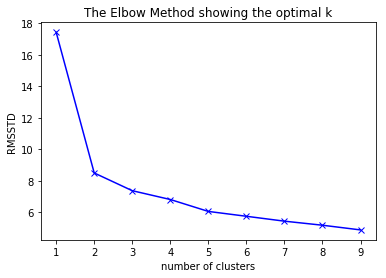

In [13]:
plt.plot(K,SSE_array,'bx-')
plt.xlabel('number of clusters')
plt.ylabel('RMSSTD')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [14]:
slope

[[2, -8.946856617665471],
 [3, -1.1274343411349292],
 [4, -0.5599197726633989],
 [5, -0.7577965797805781],
 [6, -0.3085116262332184],
 [7, -0.3109402517050368],
 [8, -0.2580221960963156],
 [9, -0.2981642197716301]]

In [15]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,7):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope > 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 3
Optimal Number of Clusters = 5
Optimal Number of Clusters = 7
